# Fuel Consumption Prediction of Vehicles

## Objective
The goal of this project is to predict the **fuel consumption (MPG)** of vehicles based on their attributes, including engine specifications, weight, and acceleration.

## Dataset Overview
The dataset contains records of vehicles with features relevant to fuel efficiency prediction.

## Instructions
1. **Data Exploration**: Load and examine the dataset.
2. **Data Preprocessing**: Handle missing values, encode categorical variables, and normalize numerical features.
3. **Feature Selection**: Identify important predictors for fuel efficiency.
4. **Model Training**: Train a regression model to predict fuel consumption (MPG).
5. **Evaluation**: Assess model performance using RMSE and R² score.

In [2]:

# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [4]:

# Load the dataset (auto-mpg.data file)
column_names = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin"]
df = pd.read_csv('auto-mpg.data', delim_whitespace=True, names=column_names, na_values='?')

# Display basic information about the dataset
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, 18.0 to 31.0
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    int64  
 1   cylinders     398 non-null    float64
 2   displacement  392 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    int64  
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 28.0+ KB


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


## Exploratory Data Analysis (EDA)
- Check for missing values
- Visualize key distributions
- Identify correlations between features

Missing values per column:
 mpg             0
cylinders       0
displacement    6
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64


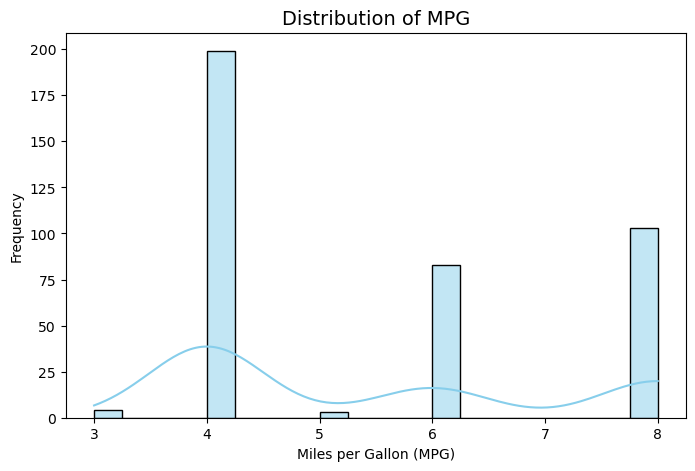

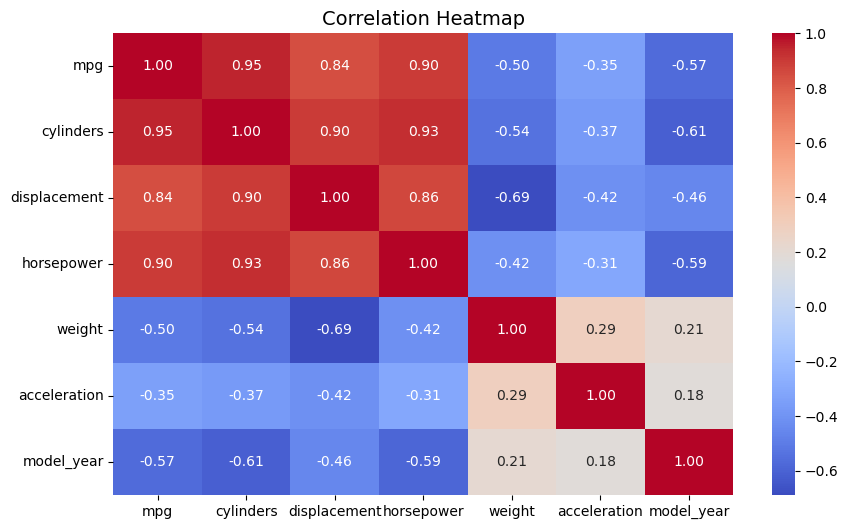

In [6]:

# Check for missing values
print("Missing values per column:\n", df.isnull().sum())


# Drop rows with missing values
df = df.dropna()


# Visualize MPG distribution
plt.figure(figsize=(8,5))
sns.histplot(df['mpg'], bins=20, kde=True, color="skyblue")
plt.title("Distribution of MPG", fontsize=14)
plt.xlabel("Miles per Gallon (MPG)")
plt.ylabel("Frequency")
plt.show()


# Correlation heatmap (numerical features only)
plt.figure(figsize=(10,6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap", fontsize=14)
plt.show()



## Data Preprocessing
- Handle missing values
- Encode categorical variables
- Normalize numerical features

In [8]:
from sklearn.preprocessing import StandardScaler

# --- Handle missing values (horsepower) ---
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())


# Encode categorical variables (Origin as categorical feature)
# origin: 1=USA, 2=Europe, 3=Japan
df = pd.get_dummies(df, columns=['origin'], drop_first=True)

# --- Define features (X) and target variable(y) ---
X = df.drop('mpg', axis=1)
y = df['mpg']

# --- Normalize numerical features ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
# --- Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (313, 306)
Test shape: (79, 306)


## Model Training
Train a **Linear Regression** model to predict fuel consumption.

In [10]:
# --- Train Linear Regression model ---
model = LinearRegression()
model.fit(X_train, y_train)

# --- Predictions ---
y_pred = model.predict(X_test)

# --- Model Evaluation ---
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Linear Regression Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")




Linear Regression Performance:
RMSE: 353997444466851.62
R² Score: -42061195229129501532905013248.00
